# KUIS

***M Favian Apta S*** |
***TI-3A*** |
***13***

In [184]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [185]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [186]:
#cek data
print(df['sex'].value_counts())
print('\n')
print(df['smoker'].value_counts())
print('\n')
print(df['region'].value_counts())
print('\n')

male      676
female    662
Name: sex, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64




Menggunakan fitur mapping

In [187]:
new_sex = {
    'male': 0,
    'female': 1
}

new_smoker = {
    'yes': 0,
    'no': 1
}

new_region = {
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast' : 3
}

df['sex'] = df['sex'].map(new_sex)
df['smoker'] = df['smoker'].map(new_smoker)
df['region'] = df['region'].map(new_region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# VIF dataframe
df_data = pd.DataFrame()
df_data["feature"] = X.columns

# calculating VIF for each feature
df_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(df_data)


    feature        VIF
0       age   7.968575
1       sex   1.944441
2       bmi  10.288059
3  children   1.800429
4    smoker   4.503301
5    region   2.557388


In [189]:
df_drop = df.copy()
df_drop = df_drop.drop(df.columns[0], axis = 1)
df_drop = df_drop.drop(df.columns[2], axis = 1)

df_drop.head()

,sex,children,smoker,region,charges
0,1,0,0,0,16884.92400
1,0,1,1,1,1725.55230
2,0,3,1,1,4449.46200
3,0,0,1,2,21984.47061
4,0,0,1,2,3866.85520


In [190]:
x = df_drop.iloc[:,:-1].values
y = df_drop.iloc[:,4].values

y = y.reshape(len(y), 1)

xm_train, xm_test, ym_train, ym_test = train_test_split(x,y, test_size= 0.2, random_state=100)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

y.shape

(1338, 1)

In [191]:
lr = LinearRegression()
lr.fit(xm_train, ym_train)

ym_pred = lr.predict(xm_test)

gabungf = np.concatenate((ym_test, ym_pred))
gabungf


r2_value = r2_score(ym_test, ym_pred)
print(f'Hasil dari R2 : {r2_value}')

Hasil dari R2 : 0.6830228341414403


Jawaban R2 = 1.0

In [198]:
x = df_drop.iloc[:,-1].values
y = df_drop.iloc[:,4].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

xm_train, xm_test, ym_train, ym_test = train_test_split(x,y, test_size= 0.2, random_state=50)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

y.shape

(1338, 1)

In [199]:
r = LinearRegression()
lr.fit(xm_train, ym_train)

ym_pred = lr.predict(xm_test)

gabungraihan = np.concatenate((ym_test, ym_pred))
gabungraihan

r2_lr = r2_score(ym_test,ym_pred)
print(r2_lr)

1.0


In [200]:
print(ym_pred)
print(ym_test)

[[ 5976.8311 ]
 [ 5846.9176 ]
 [13831.1152 ]
 [ 9625.92   ]
 [ 2680.9493 ]
 [47896.79135]
 [18223.4512 ]
 [ 7419.4779 ]
 [ 3732.6251 ]
 [12222.8983 ]
 [ 7050.0213 ]
 [21978.6769 ]
 [ 6282.235  ]
 [37701.8768 ]
 [ 7046.7222 ]
 [12032.326  ]
 [13112.6048 ]
 [ 4239.89265]
 [12333.828  ]
 [ 3410.324  ]
 [ 1727.785  ]
 [44641.1974 ]
 [17128.42608]
 [ 6112.35295]
 [ 4529.477  ]
 [10594.50155]
 [ 6402.29135]
 [46151.1245 ]
 [ 1711.0268 ]
 [ 1704.70015]
 [45863.205  ]
 [ 4687.797  ]
 [15019.76005]
 [ 3180.5101 ]
 [ 3861.20965]
 [ 3443.064  ]
 [27117.99378]
 [ 2709.24395]
 [13451.122  ]
 [47928.03   ]
 [23563.01618]
 [ 6710.1919 ]
 [14235.072  ]
 [14001.1338 ]
 [27218.43725]
 [13390.559  ]
 [41034.2214 ]
 [ 2020.177  ]
 [14256.1928 ]
 [21232.18226]
 [48675.5177 ]
 [ 6986.697  ]
 [ 4149.736  ]
 [30942.1918 ]
 [ 8023.13545]
 [42124.5153 ]
 [11837.16   ]
 [ 6640.54485]
 [ 6666.243  ]
 [10848.1343 ]
 [14394.39815]
 [ 7201.70085]
 [ 1977.815  ]
 [ 1635.73365]
 [ 7256.7231 ]
 [ 8538.28845]
 [ 3857.75

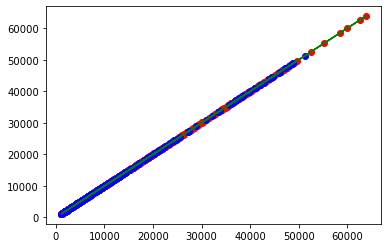

In [201]:
import matplotlib.pyplot as plt

plt.scatter(xm_train, ym_train, color='red')
plt.plot(xm_train, lr.predict(xm_train), color='green')
plt.scatter(xm_test, ym_pred, color = 'blue')
plt.show()

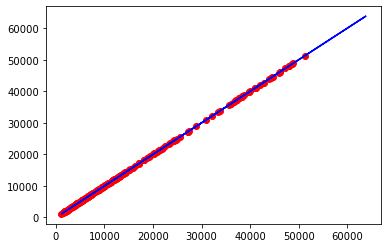

In [202]:
# Visualisasi data Testing
plt.scatter(xm_test, ym_test, color='red')
plt.plot(xm_train, lr.predict(xm_train), color='blue') # Regresion Line
# plt.scatter(x_test, y_pred, color = 'green')
plt.show()

In [203]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_value = r2_score(ym_test, ym_pred)
print(f'Hasil dari R2 : {r2_value}')

Hasil dari R2 : 1.0
